In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('SF_data/SFdep_budgets_1999-2017.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AAM Asian Art Museum,3.688368e+06,3.432263e+07,2.507488e+07,1.788011e+07,1.935935e+07,1.055472e+07,9.882500e+06,9.549676e+06,9.730164e+06,1.028110e+07,1.060280e+07,1.022601e+07,9.693537e+06,1.025095e+07,1.104159e+07,9.012591e+06,9.283314e+06,9.921711e+06,1.096220e+07
1,ADM Gen Svcs Agency-City Admin,1.516243e+08,2.148997e+08,3.627561e+08,2.268455e+08,3.137591e+08,2.129887e+08,1.574041e+08,1.846677e+08,2.262570e+08,2.177347e+08,2.160612e+08,1.841071e+08,2.022281e+08,2.287494e+08,1.981117e+08,1.790855e+08,2.352913e+08,3.554298e+08,4.721588e+08
2,ADP Adult Probation,1.148518e+07,1.235684e+07,1.024342e+07,1.039955e+07,1.051980e+07,9.902224e+06,1.065615e+07,1.123390e+07,1.190935e+07,1.202555e+07,1.255669e+07,1.212385e+07,1.310984e+07,2.335198e+07,3.526246e+07,3.573864e+07,3.966526e+07,4.700311e+07,4.692031e+07
3,AIR Airport Commission,2.278243e+09,1.831911e+09,1.835415e+09,1.444501e+09,1.224237e+09,1.237556e+09,1.190740e+09,1.210774e+09,1.266286e+09,1.325257e+09,1.419419e+09,1.974136e+09,1.567919e+09,1.546343e+09,1.960540e+09,2.583995e+09,2.272496e+09,2.449163e+09,1.994478e+09
4,ART Arts Commission,1.251809e+07,1.411478e+07,1.721827e+07,1.700585e+07,1.522773e+07,1.375732e+07,1.389025e+07,1.354485e+07,1.586172e+07,1.849631e+07,1.827977e+07,1.752000e+07,1.877900e+07,2.042381e+07,2.088583e+07,1.976552e+07,2.147180e+07,2.806038e+07,2.663214e+07


In [3]:
pol_budget = df[df['Department'] == 'POL Police']
other_budget = df[df['Department'] != 'POL Police']

In [4]:
# pol_budget_num = pol_budget.values
years = df.columns
years = years[1:]
pol_budget_num = []
for year in years:
    pol_budget_num.append(pol_budget[year].sum())

In [5]:
pol_budget_num

[287771647.45000005,
 317469140.6800002,
 342384084.65999985,
 346390817.30999964,
 362280508.4699999,
 343369251.44999963,
 367509553.56,
 404819250.2200004,
 435203732.7899997,
 469210705.2799997,
 479903043.0300004,
 502619548.8399993,
 511054535.0799997,
 539513011.0700003,
 570621505.5499997,
 577370790.1900004,
 591380247.7600003,
 626633289.9499996,
 650403966.1999996]

In [6]:
years = df.columns
years = years[1:]
sum_years_num = []
for year in years:
    sum_years_num.append(df[year].sum())

In [7]:
sum_years_num

[11351895683.350002,
 13803563097.36,
 11561793533.880001,
 11968102977.88,
 12971263334.390001,
 12976084799.640001,
 13827019078.220003,
 15129807846.55,
 16003874090.519997,
 16653367305.60001,
 17730148847.98,
 20227279142.230003,
 20297796919.849995,
 22421112086.579994,
 23288211725.92,
 23815738631.76,
 24537323646.61,
 26412567669.02,
 26547182099.0]

In [8]:
sum_years=sum_years_num.copy()

In [9]:
sum_years.insert(0,'All Departments')

In [10]:
sum_years = pd.DataFrame(sum_years)

In [11]:
sum_years_T = sum_years.T

In [12]:
sum_years_T.columns =df.columns

In [13]:
sum_years_T

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Departments,1.13519e+10,1.38036e+10,1.15618e+10,1.19681e+10,1.29713e+10,1.29761e+10,1.3827e+10,1.51298e+10,1.60039e+10,1.66534e+10,1.77301e+10,2.02273e+10,2.02978e+10,2.24211e+10,2.32882e+10,2.38157e+10,2.45373e+10,2.64126e+10,2.65472e+10


In [22]:
df_total = df.append(sum_years_T)

In [15]:
df['2017'].max()

3561006318.910003

Data Visualization of percentage of budget that is police vs everything else

In [16]:
cols = df.columns
cols[1:]

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

In [17]:
type(sum_years_num)

list

In [18]:
len(pol_budget_num)

19

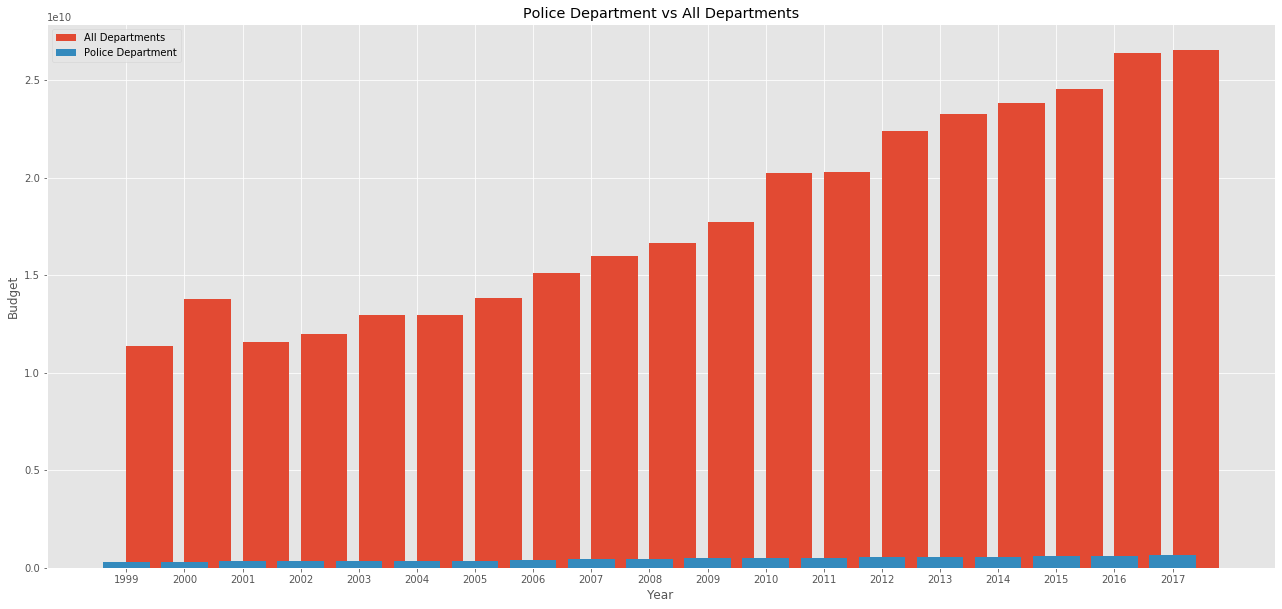

In [19]:
plt.figure(figsize=(22,10))
# np.set_printoptions(suppress=True)

plt.title('Police Department vs All Departments')
plt.xlabel('Year')
plt.ylabel('Budget')

plt.bar(cols[1:], sum_years_num, align='edge', label='All Departments')
plt.bar(cols[1:], pol_budget_num, align='center', label='Police Department')

# for a,b in zip(cols[1:], sum_years_num):
#     plt.text(a, b, str(b), horizontalalignment='left')

# for a,b in zip(cols[1:], pol_budget_num):
#     plt.text(a, b, str(b), horizontalalignment='left')

plt.legend()
plt.show()

In [47]:
df[df['Department'] == 'POL Police']

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
44,POL Police,2.877716e+08,3.174691e+08,3.423841e+08,3.463908e+08,3.622805e+08,3.433693e+08,3.675096e+08,4.048193e+08,4.352037e+08,4.692107e+08,4.799030e+08,5.026195e+08,5.110545e+08,5.395130e+08,5.706215e+08,5.773708e+08,5.913802e+08,6.266333e+08,650403966.2


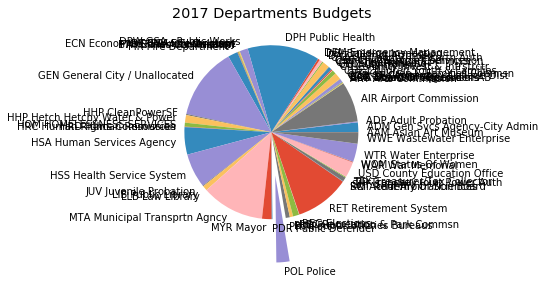

In [61]:

plt.title('2017 Departments Budgets')

slices = df['2017']
labels = df['Department']
explode = np.zeros(len(df['Department']))
explode[44] = 0.5
plt.pie(slices, labels=labels, explode=explode)

# plt.legend()
plt.show()

In [37]:
df_excl = pd.DataFrame()
df_excl = df_excl.append(df_total[df_total['Department'] == 'POL Police'])
df_excl = df_excl.append(df_total[df_total['Department'] == 'All Departments'])
df_excl

,Department,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
44,POL Police,2.87772e+08,3.17469e+08,3.42384e+08,3.46391e+08,3.62281e+08,3.43369e+08,3.6751e+08,4.04819e+08,4.35204e+08,4.69211e+08,4.79903e+08,5.0262e+08,5.11055e+08,5.39513e+08,5.70622e+08,5.77371e+08,5.9138e+08,6.26633e+08,6.50404e+08
0,All Departments,1.13519e+10,1.38036e+10,1.15618e+10,1.19681e+10,1.29713e+10,1.29761e+10,1.3827e+10,1.51298e+10,1.60039e+10,1.66534e+10,1.77301e+10,2.02273e+10,2.02978e+10,2.24211e+10,2.32882e+10,2.38157e+10,2.45373e+10,2.64126e+10,2.65472e+10


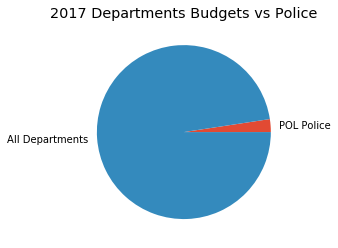

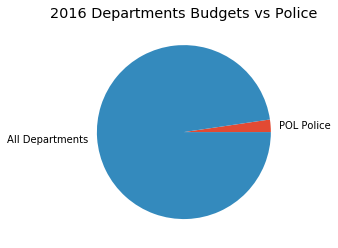

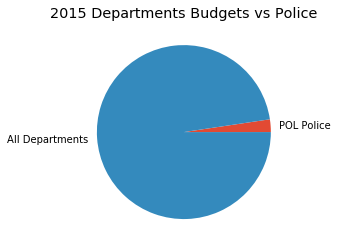

In [68]:



slices_2017 = df_excl['2017']
slices_2016 = df_excl['2016']
slices_2015 = df_excl['2015']

labels = df_excl['Department']

plt.title('2017 Departments Budgets vs Police')
plt.pie(slices_2017, labels=labels)
plt.show()

plt.title('2016 Departments Budgets vs Police')
plt.pie(slices_2016, labels=labels)
plt.show()

plt.title('2015 Departments Budgets vs Police')
plt.pie(slices_2015, labels=labels)
plt.show()